# Cahpter 05 - 회귀

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [파이썬 머신러닝 완벽 가이드]
- image: images/kaggle_logo.png

# 01. 회귀 소개

$Y = W_1X_1 + W_2X_2 + W_3X_2 +\dots W_nX_n$

$X_1, X_2, X_3, \dots X_n$을 독립(Independent variable)변수라 한다. 머신러닝에서 피처에 해당한다.

$Y$를 종속 변수(Dependent variable)라 한다. 머신러닝에서 결정 값에 해당한다.

$W_1, W_2, W_3, \dots W_n$을 회귀계수(Regression Coefficients)라 한다.

**머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀계수를 찾아내는 것이다.**

|독립변수 개수|회귀계수의 결합|
|-------------|-------------|
|1개: 단일 회귀|선형: 선형 회귀|
|여러 개: 다중 회귀|비선형 : 비선형 회귀|

# 02. 단순 선형 회귀를 통한 회귀 이해

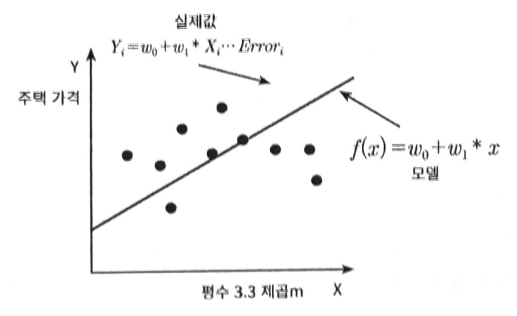

회귀모델을 $\hat{Y} = w_0 + w_1X$로 모델링 했다면 

실제 주택 가격은 $Y = w_0 + w_1X + \epsilon$ 입니다.

$Error^2 = RSS$(Residual Sum of Square)

$RSS(w_0, w_1) = \dfrac{1}{N}\sum_{i=1}^N (Y - \hat{Y})^2 = \dfrac{1}{N}\sum_{i=1}^N (Y - (w_0 + w_1X_i))^2$

회귀에서 RSS는 비용이며 w 변수(회귀계수)로 구성되는 RSS를 비용함수 또는 손실함수(loss function)이라고 합니다.

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 손실 함수가 반환하는 값을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것입니다.

# 03. 경사 하강법(Gradient Descent) 소개

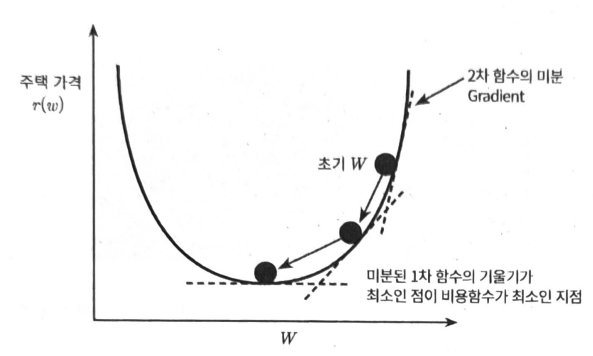

예를 들어 비용 함수가 위와 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 $w$에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 $w$를 업데이트합니다.

마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 $w$를 반환합니다.

결국 $R(w)$를 미분하여 $R^\prime(w)$의 최솟값을 구해야 하는데 파라미터가 두 개이므로 일반적인 미분을 적용할 수 없고 $w_0, w_1$ 각 변수에 편미분을 적용해야 합니다.

$\dfrac{\partial R(w)}{\partial W_1} = \dfrac{2}{N}\sum_{i=1}^N -X(Y - (w_0 + w_1X)) = -\dfrac{2}{N} \sum_{i=1}^N X(Y - \hat{Y})$

$\dfrac{\partial R(w)}{\partial W_0} = \dfrac{2}{N}\sum_{i=1}^N -(Y - (w_0 + w_1X)) = -\dfrac{2}{N} \sum_{i=1}^N (Y - \hat{Y})$

$w_1, w_0$의 편미분 결괏값인 $-\dfrac{2}{N} \sum_{i=1}^N X(Y - \hat{Y})$,  $\quad-\dfrac{2}{N} \sum_{i=1}^N (Y - \hat{Y})$을 반복적으로 보정하면서 $w_1, w_0$값을 업데이트하면 손실 함수 $R(w)$가 최소가 되는 $w_1, w_0$을 구할 수 있습니다.

업데이트는 새로운 $w_1$을 이전 $w_1$에서 편미분 결괏값을 마이너스(-)하면서 적용합니다.

즉, 새로운 $w_1 = $ 이전 $w_1 - (-\dfrac{2}{N} \sum_{i=1}^N X(Y - \hat{Y}))$

위 편미분 값이 너무 클 수 있기 때문에 보정 계수 $\eta$(eta)를 곱하는데, 이를 학습률이라고 합니다.

요약하자면, 

새로운 $w_1 = $ 이전 $w_1 + \eta\dfrac{2}{N} \sum_{i=1}^N X(Y - \hat{Y})$

새로운 $w_0 = $ 이전 $w_0 + \eta\dfrac{2}{N} \sum_{i=1}^N (Y - \hat{Y})$

위 내용을 종합한 경사 하강법의 일반적인 프로세스는 다음과 같습니다.

- **Step 1**: $w_1, w_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산합니다.

- **Step 2**: $w_1$을 $w_1 + \eta\dfrac{2}{N} \sum_{i=1}^N X(Y - \hat{Y})$로, $w_0$을 $w_0 + \eta\dfrac{2}{N} \sum_{i=1}^N (Y - \hat{Y})$로 업데이트 한 후 다시 비용 함수의 값을 계산합니다.

- **Step 3**: 비용 함수의 값이 감소했으면 다시 **Step 2**를 반복합니다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $w_1, w_0$를 구하고 반복을 중지합니다.

## 파이썬으로 구현

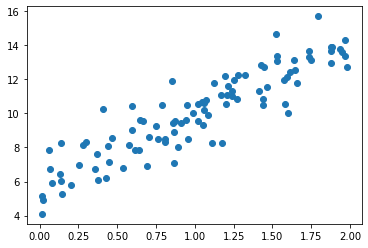

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(8)
# Y = 4X + 6을 근사(w1 = 4, w0 = 6), 임의의 값은 노이즈를 위해 만듦
x = 2 * np.random.rand(100, 1)
y = 4*x + 6 + np.random.randn(100, 1) # 오차가 표준정규분포를 따른다

plt.scatter(x,y)

데이터는 $Y = 4X + 6$을 중심으로 무작위로 포져 있습니다. 다음으로 비용 함수를 정의해 보겠습니다.

비용 함수 get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아 $RSS(w_0, w_1) = \dfrac{1}{N}\sum_{i=1}^N (Y - \hat{Y})^2$를 계산하여 반환합니다.

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = 1/N * np.sum((y-y_pred)**2)
    return(cost)

이제 경사 하강법을 gradient_descent()라는 함수를 생성해 구현해 보겠습니다.

gradient_descent()는 $w_1$과 $w_0$을 모두 0으로 초기화한 뒤 iters의 개수만큼 반복하면서 $w_1$과 $w_0$을 업데이트합니다.

get_weight_update() 함수에서, 입력 배열 $X$값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 구합니다.

In [3]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계싼하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(x, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(x, y, iters = 10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()를 호출해 w1, w0 업데이트 수행.
    for _ in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

이제 gradient_descent_steps()를 호출해 w1과 w0을 구해보겠습니다. 

그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost()함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해 보겠습니다.

In [5]:
w1, w0 = gradient_descent_steps(x, y, iters = 10000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * x + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.146 w0 : 5.832
Gradient Descent Total Cost:1.1706


실제 선형식인 $y = 4x + 6$과 유사하게 $w1 = 4.146, w0 = 5.832$가 도출되었고 예측 오류 비용은 약 1.1706입니다.

앞에서 구한 y_pred에 기반하여 회귀선을 그려 보겠습니다.

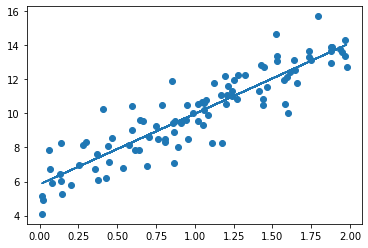

In [6]:
plt.scatter(x,y)
plt.plot(x, y_pred)

회귀선이 잘 만들어졌음을 알 수 있습니다.

## 확률적 경사 하강법(Stochastic Gradient Descent)

확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장합니다.

따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출합니다.

(미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현해 보겠습니다. 앞의 gradient_descent_steps()과 다른 점은 전체 x, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산한다는 것입니다.

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

이렇게 만들어진 stochastic_gradient_descent_steps()를 지용해 w1, w0 및 예측 오류 비용을 계산하여 보겠습니다.

In [8]:
w1, w0 = stochastic_gradient_descent_steps(x, y, iters = 10000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * x + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.096 w0 : 5.841
Stochastic Gradient Descent Total Cost:1.1731


회귀선이 잘 만들어졌습니다. 경사 하강법보다 성능이 낮긴 하지만 거의 차이가 없습니다.

# 04. 사이킷런 LinearRegression 소개 및 보스턴 주택 가격 예측

## LinearRegression 클래스 - Ordinary Least Squares

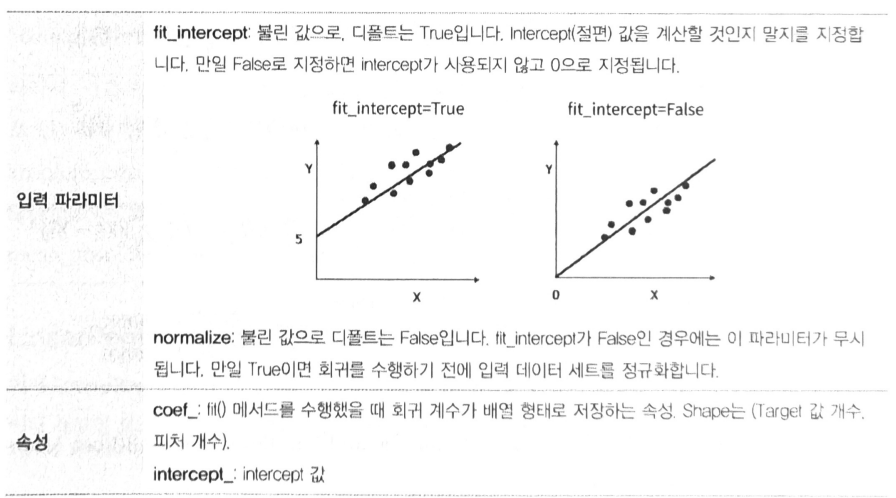

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받습니다.

피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해지는데 이를 다중공선성(multi-collinearity) 문제라고 합니다.

일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 중요한 피처만 남기고 제거하거나 규제를 적용합니다.

## 회귀 평가 지표

MAE(Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것입니다.

$MAE = \dfrac{1}{n} \sum _{i=1} ^n |Y_i - \hat{Y_i}|$

MSE(Mean Squared Error)이며 실제 값과 예측값의 차이를 제곱해 평균한 것입니다.

$MSE = \dfrac{1}{n} \sum _{i=1} ^n (Y_i - \hat{Y_i})^2$

RMSE(Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것입니다. (사이킷런에서는 제공하지 않습니다.)

$RMSE = \sqrt{MSE} = \sqrt{\dfrac{1}{n} \sum _{i=1} ^n (Y_i - \hat{Y_i})^2}$

$R^2$ : 분산 기반으로 예측 성능을 평가합니다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울 수록 예측 정확도가 높습니다.

$R^2 = \dfrac{Var(\hat{Y})}{Var({Y})}$

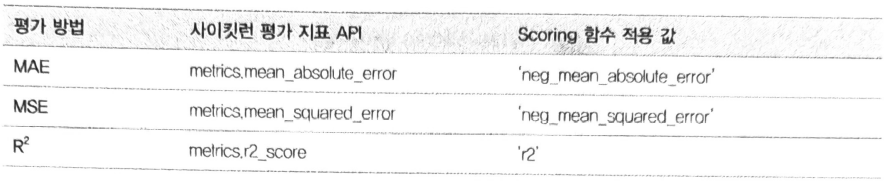

## 보스턴 주택 가격 예측

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [10]:
# boston 데이터 세트 로드
boston = load_boston()

C:\Users\woo\anaconda3\envs\py39r41\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [11]:
# boston 데이터 세트 DataFrame 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
boston_df['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', boston_df.shape)
boston_df.head(5)

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

다음으로 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보겠습니다.

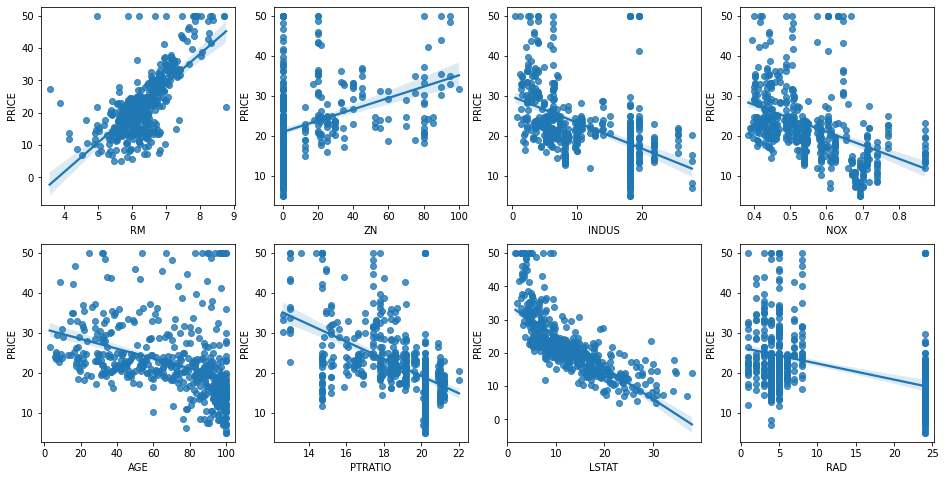

In [13]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 replot을 이용해 산점도와 선형 회귀 직선을 함깨 표현
    sns.regplot(x=feature, y='PRICE', data = boston_df, ax = axs[row][col])

RM(방 개수)은 양 방향의 선형성이 가장 큽니다. 즉, 방의 크기가 클수록 가격이 증가하는 모습을 확연히 보여줍니다.

LSTAT(하위 계층의 비율)는 음 방향의 선형성이 가장 큽니다. 하위 계층이 비율이 높을 수록 PRICE가 증가하는 모습이 확연히 나타납니다.

이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들겠습니다.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
y_target = boston_df['PRICE']
X_data = boston_df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3)

In [16]:
# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 24.111 , RMSE : 4.910
Variance score : 0.713


In [17]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 39.880455324577774
회귀 계수값: [ -0.1   0.    0.    4.  -16.6   3.4   0.   -1.4   0.3  -0.   -1.    0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해보겠습니다.

In [18]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

CHAS        4.0
RM          3.4
RAD         0.3
ZN          0.0
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -1.0
DIS        -1.4
NOX       -16.6
dtype: float64

이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해보겠습니다.

사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인 데 반해, 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델입니다. 

사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 scoring = 'neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환합니다.

따라서 cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 됩니다.

In [19]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.iloc[:, :-1]
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores) # 5 폴드 세트로 나누었으므로 RMSE 값은 5개가 있겠다.
avg_rmse = np.mean(rmse_scores) # 5개의 RMSE 평균

In [20]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


# 05. 다항 회귀와 과(대)적합/과소적합 이해

## 다항 회귀 이해

지금까지 배운 내용은 $Y = W_1X_1 + W_2X_2 + W_3X_2 +\dots W_nX_n$과 같이 일차 방정식 형태로 표현된 회귀였습니다.

하지만 세상의 모든 관계를 직선으로만 표현할 수는 없고 독립변수가 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 합니다.

즉 다항 회귀는 $Y = W_1X_1 + W_2X_2 + W_3X^2_2 + W_4X^3_4$과 같이 표현할 수 있습니다.

참고로 다항회귀 또한 선형회귀입니다. 선형회귀/비선형회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수와는 무관합니다.

- Polynomial : 다항식

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


$[x_1, x_2] \to [1,\,x_1,\,x_2,\, x^2_1,\, x_1x_2,\, x^2_2]$

$ Let \,x_1 = 0,\, x_2 = 1$

$[x_1, x_2] = [0, 1] \to  [1,\,0,\,1,\,0^2,\,0\times 1 ,\,1^2] = [1,\,0,\,1,\,0,\,0,\,1]$

$Let x_1 = 2, x_2 = 3$

$[x_1, x_2] = [2,3] \to [1,\,2,\,3,\,2^2,\,2\times 3,\,3^2] = [1,\,2,\,3,\,4,\,6,\,9]$

In [22]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


## 파이썬으로 구현 2

이번에는 삼차 다항 계수를 이용해 삼차 다항 회귀 함수식을 유도해보겠습니다.

회귀식은 $Y = 1 + 2X_1 + 3X_1^2 + 4X_2^3$

In [35]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return(y)

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [36]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


$[x_1, x_2] \to [1,\,x_1,\,x_2,\,x_1^2,\, x_1x_2,\, x_2^2, \,x_1^3, \,x_1^2 x_2, \,x_1x_2^2,\, x_2^3]$

In [37]:
y

array([  5, 125])

In [38]:
np.sum(poly_ftr[0,:] * np.round(model.coef_, 2)), np.sum(poly_ftr[1,:] * np.round(model.coef_, 2))

(3.2399999999999998, 123.11999999999999)

In [39]:
X

array([[0, 1],
       [2, 3]])

- 이와같은 일련의 과정을 명료하게 하려면 사이킷런의 Pipeline 객체를 이용해 다항 회귀를 구현합니다.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 차수가 높아질수록 과적합의 문제가 크게 발생합니다.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

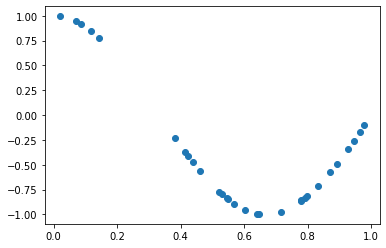

In [30]:
plt.scatter(X, true_fun(X))

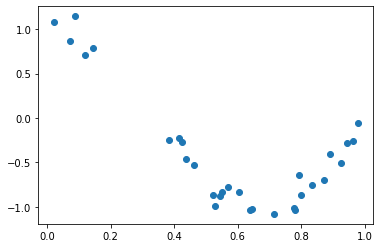

In [31]:
plt.scatter(X, y)

이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교하겠습니다.

다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가합니다.

그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보겠습니다.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 16 회귀 계수는 [-3.91165000e+03  1.40623530e+05 -2.64355533e+06  3.02188220e+07
 -2.27965869e+08  1.19431911e+09 -4.49431864e+09  1.24171105e+10
 -2.55088951e+10  3.91359862e+10 -4.46530598e+10  3.73413137e+10
 -2.22239121e+10  8.91095939e+09 -2.15754305e+09  2.38293632e+08] 입니다.
Degree 16 MSE 는 12670892284.07 입니다.


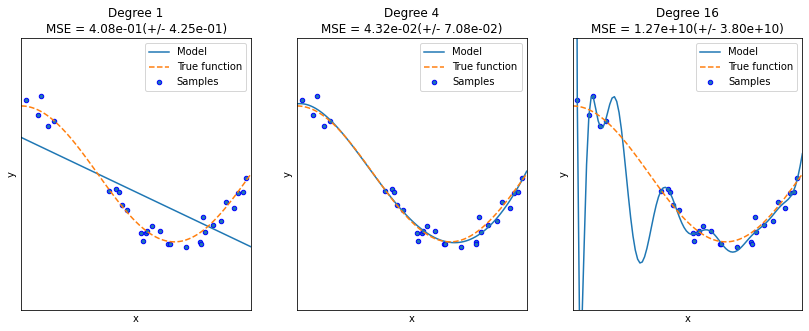

In [32]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 16]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [33]:
polynomial_features.

SyntaxError: invalid syntax (2494178525.py, line 1)

## 편향-분산 트레이드오프(Bias-Variance Trade off)

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있습니다.

즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아집니다(과적합).

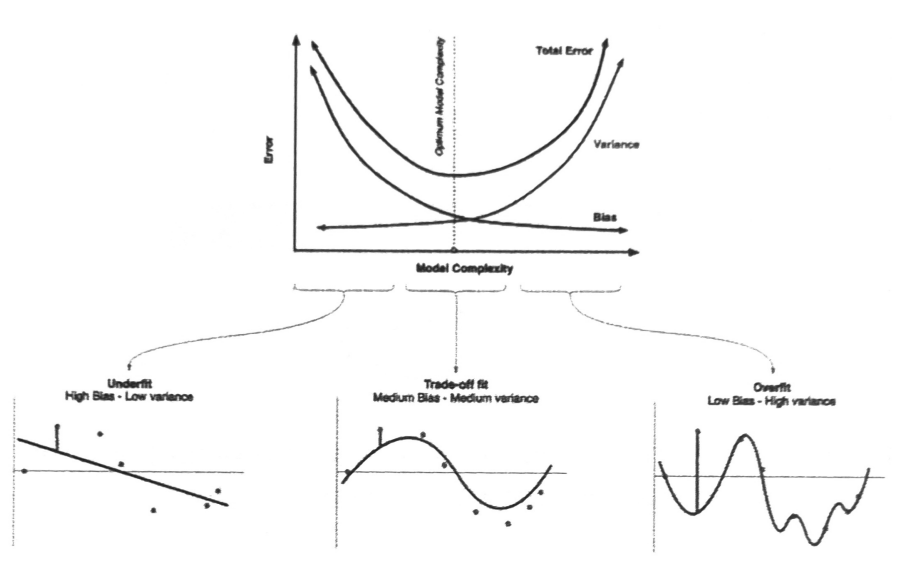